In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:

# Fetch historical data
def fetch_data(symbol, interval, start, end):
    df = yf.download(tickers=symbol, interval=interval, start=start, end=end)
    df = df[['Close']]
    return df

# Preprocess data
def preprocess_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Transformer Model using only the encoder
class EncoderOnlyTransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, num_heads, dropout):
        super(EncoderOnlyTransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, src):
        src = self.fc1(src)
        output = self.transformer_encoder(src)
        output = self.fc2(output[:, -1, :])
        return output


In [3]:
# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
display(device)


'cpu'

In [4]:

# Hyperparameters
input_dim = 1
hidden_dim = 128
output_dim = 1
num_layers = 6
num_heads = 8
dropout = 0.03
lr = 0.0001
epochs = 10

time_step=60





In [5]:

def parse_date(year, month, day):
    
    if month<10:
        m=f"0{month}"
    else:
        m=f"{month}"

  
    date=f"{year}-"+m+'-'+day

    
    return date



In [6]:
display(parse_date(2024,5,'01'))

'2024-05-01'

In [7]:

list=[('01','08'),
      ('08','15'),
      ('15','22'),
      ('22','27'),
      ('27','28')]

list=[('20','22'),
      ('23','25'),
      ('26','27'),
      ('28','30'),
      ('01','07'),
      ('08','15')]

month=[4,
            4,
            4,
            4,
            5,
            5]

list=[('3','10')]

month=[6]
      


symbol = 'HNT-USD'
interval = '1m'


year =2024



index=0
for dates in list:
    start_day = dates[0]
    end_day = dates[1]

    start_date = parse_date(year, month[index], start_day)
    end_date   = parse_date(year, month[index], end_day)

    print(f" start date: {start_date}  end date: {end_date}")

    print(start_date)
    print(end_date)

    df = fetch_data(symbol, interval, start_date, end_date)
    # for demostrate purpose
    # data, scaler = preprocess_data(df)
    # a, b = create_dataset(data, time_step)
    
    # 
    df = df.to_numpy()
    X1, Y1 = create_dataset(df, time_step)
    
    if index>1:
      X = np.concatenate((X, X1), axis=0)
      Y = np.concatenate((Y, Y1), axis=0)
      print(X1.shape)
      print(X.shape)
      print(Y1.shape)
      print(Y.shape)
      print('\n')
    else: 
      X=X1
      Y=Y1
 
    index=index+1
    print(index)


    






 start date: 2024-06-3  end date: 2024-06-10
2024-06-3
2024-06-10


[*********************100%%**********************]  1 of 1 completed

1


In [8]:
# a = a.reshape(a.shape[0], time_step, input_dim)

# a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, shuffle=False)

In [9]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)



X_train_scaled = []
Y_train_scaled = []

# Scale each segment of X_train and transform Y_train using the same scaler
for i in range(X_train.shape[0]):
    scaler_1 = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled.append(scaler_1.fit_transform(X_train[i].reshape(-1, 1)).flatten())
    Y_train_scaled.append(scaler_1.transform(Y_train[i].reshape(-1, 1)).flatten())

X_train_scaled = np.array(X_train_scaled)
Y_train_scaled = np.array(Y_train_scaled)


In [10]:
print(X_train_scaled[:3])
print(Y_train_scaled[:5])

[[0.9860083  0.96239258 0.93283039 0.95228641 0.95295764 0.95750494
  0.95217297 0.952986   0.96032219 0.950528   0.96168354 0.96266674
  0.987606   0.99711658 1.         0.99204931 0.9831816  0.98923206
  0.99125519 0.97418153 0.96744094 0.96389574 0.96002912 0.91594581
  0.91218318 0.87742137 0.87859365 0.87900016 0.86122692 0.85902417
  0.84624257 0.8418938  0.85267119 0.84304717 0.77652042 0.72819233
  0.59496866 0.59342768 0.59109258 0.28358717 0.24802178 0.2411961
  0.05601407 0.04248561 0.06863496 0.16430793 0.18568309 0.24579067
  0.23180843 0.22910463 0.13923632 0.12098093 0.08611513 0.00222165
  0.         0.02052431 0.04973671 0.04967999 0.19974096 0.18953081]
 [0.96239258 0.93283039 0.95228641 0.95295764 0.95750494 0.95217297
  0.952986   0.96032219 0.950528   0.96168354 0.96266674 0.987606
  0.99711658 1.         0.99204931 0.9831816  0.98923206 0.99125519
  0.97418153 0.96744094 0.96389574 0.96002912 0.91594581 0.91218318
  0.87742137 0.87859365 0.87900016 0.86122692 0.85

In [11]:
X_test_scaled = []
scalers_list = []

# Scale each segment of X_test and transform Y_test using the stored scalers
for i in range(X_test.shape[0]):
    scaler_2 = MinMaxScaler(feature_range=(0, 1))
    scaled_X_test = scaler_2.fit_transform(X_test[i].reshape(-1, 1)).flatten()
    X_test_scaled.append(scaled_X_test)
    scalers_list.append(scaler_2)

X_test_scaled = np.array(X_test_scaled)


In [12]:
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], time_step, input_dim)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], time_step, input_dim)

In [13]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train_scaled, dtype=torch.float32).view(-1, 1).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1).to(device)


In [14]:

# Initialize model, loss function, and optimizer
model = EncoderOnlyTransformerModel(input_dim, hidden_dim, output_dim, num_layers, num_heads, dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


In [15]:
epoch_loops=2
print(f"transformer_model{epoch_loops}.pth")

transformer_model2.pth


In [16]:

num_loops = 20
# Training loop
for epoch_loops in range(num_loops):

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, Y_train)
        loss.backward()
        optimizer.step()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    # Save the model
    torch.save(model.state_dict(), f"transformer_modelB{epoch_loops}.pth")
    print(f"Model saved as transformer_model{epoch_loops}.pth")
    

: 

: 

In [ ]:
# a_test =  torch.tensor(a_test, dtype=torch.float32).to(device)

In [ ]:

# Evaluation
model.load_state_dict(torch.load('transformer_modelB19.pth'))
model.eval()
with torch.no_grad():
    predictions = model(X_test).numpy()
    # a is for all data doing min max
    # predictions_a = model(a_test).numpy()
    # predictions_a = scaler.inverse_transform(predictions_a)
    
    # actual = scaler.inverse_transform(b_test.numpy())



In [ ]:
print(predictions[:1000])

[[ 2.92358279e-01]
 [ 2.23087549e-01]
 [ 2.59488553e-01]
 [ 1.56174064e-01]
 [ 6.62364438e-02]
 [ 8.20820108e-02]
 [ 5.52105680e-02]
 [ 3.45058218e-02]
 [ 4.46426645e-02]
 [ 2.96116352e-01]
 [ 2.57936925e-01]
 [ 1.96992636e-01]
 [ 1.55836642e-01]
 [ 7.58186355e-02]
 [ 2.15033665e-02]
 [-4.25034016e-03]
 [-4.25034016e-03]
 [ 2.88105384e-02]
 [-4.25034016e-03]
 [ 3.14656571e-02]
 [ 3.43259349e-02]
 [ 2.86450163e-02]
 [ 2.81176046e-02]
 [ 2.31135860e-02]
 [ 8.50881115e-02]
 [ 1.10021956e-01]
 [ 1.19772457e-01]
 [ 1.08826660e-01]
 [ 1.09528370e-01]
 [ 6.78300336e-02]
 [ 1.19573124e-01]
 [ 1.34290874e-01]
 [ 1.62273079e-01]
 [ 2.15285659e-01]
 [ 2.30779797e-01]
 [ 3.19106042e-01]
 [ 2.52506107e-01]
 [ 2.69946128e-01]
 [ 2.06682146e-01]
 [ 1.93305165e-01]
 [ 1.79548621e-01]
 [ 1.78424358e-01]
 [ 1.14504762e-01]
 [ 2.43463457e-01]
 [ 1.89682305e-01]
 [ 1.60417289e-01]
 [ 3.77389565e-02]
 [ 4.65455428e-02]
 [ 1.31322026e-01]
 [ 1.63613260e-01]
 [ 2.01438606e-01]
 [ 2.53411144e-01]
 [ 2.6188162

In [ ]:
# print(predictions_a)

[[3.5812283]
 [3.579266 ]
 [3.580158 ]
 ...
 [3.6927662]
 [3.6915588]
 [3.6918457]]


### transform the prediction

In [ ]:
original_scale_predictions = []
for i in range(predictions.shape[0]):
    # scaler.fit_transform(X_test[i].reshape(-1,1)).reshape(-1)
    # predictions[i] = scaler.inverse_transform(predictions[i].reshape(-1,1)).reshape(-1)
    original_scale_prediction = scalers_list[i].inverse_transform(predictions[i].reshape(-1, 1)).reshape(-1)
    original_scale_predictions.append(original_scale_prediction)
    
original_scale_predictions = np.array(original_scale_predictions)

In [ ]:
print(original_scale_predictions[:100])

[[3.5701663]
 [3.5679107]
 [3.5689552]
 [3.5659902]
 [3.5634093]
 [3.563864 ]
 [3.563093 ]
 [3.5624945]
 [3.562536 ]
 [3.5677214]
 [3.5668337]
 [3.5655756]
 [3.5647259]
 [3.5630739]
 [3.5619524]
 [3.5599675]
 [3.5592082]
 [3.5599635]
 [3.5580273]
 [3.558885 ]
 [3.558954 ]
 [3.5588174]
 [3.5588048]
 [3.5586846]
 [3.5601737]
 [3.5607727]
 [3.561007 ]
 [3.5607438]
 [3.5607607]
 [3.5597591]
 [3.5610023]
 [3.5613556]
 [3.562028 ]
 [3.5633016]
 [3.563674 ]
 [3.565796 ]
 [3.5641956]
 [3.5646148]
 [3.5630949]
 [3.5627737]
 [3.562443 ]
 [3.5624158]
 [3.5608802]
 [3.5639787]
 [3.5626864]
 [3.5619833]
 [3.5590358]
 [3.5592477]
 [3.5612845]
 [3.5615242]
 [3.5621407]
 [3.562868 ]
 [3.562954 ]
 [3.5634587]
 [3.5647447]
 [3.5635624]
 [3.5636175]
 [3.56096  ]
 [3.5609648]
 [3.561629 ]
 [3.5617564]
 [3.5619533]
 [3.559175 ]
 [3.558863 ]
 [3.5582654]
 [3.556137 ]
 [3.5570517]
 [3.558009 ]
 [3.5583992]
 [3.5562754]
 [3.5576508]
 [3.5571432]
 [3.5573962]
 [3.5556343]
 [3.5556362]
 [3.5560036]
 [3.556183 ]

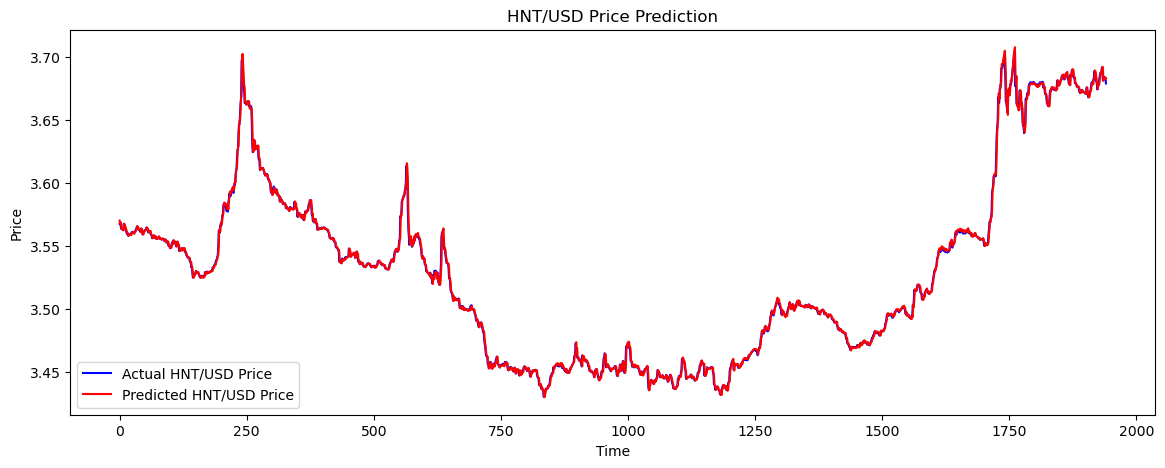

In [ ]:

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='blue', label='Actual HNT/USD Price')
plt.plot(original_scale_predictions, color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
plot_start = 1
plot_end = 100


# Plot results
plt.figure(figsize=(14, 5))
plt.plot(Y_test[plot_start: plot_end], color='blue', label='Actual HNT/USD Price')
plt.plot(original_scale_predictions[plot_start: plot_end], color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
plot_start = 1200
plot_end = 1500

display(len(actual))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(actual[plot_start: plot_end], color='blue', label='Actual HNT/USD Price')
plt.plot(predictions[plot_start: plot_end], color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
model = EncoderOnlyTransformerModel(input_dim, hidden_dim, output_dim, num_layers, num_heads, dropout).to(device)
model.load_state_dict(torch.load('transformer_modelA19.pth'))
model.eval()


In [ ]:

# Hyperparameters
input_dim = 1
hidden_dim = 128
output_dim = 1
num_layers = 6
num_heads = 8
dropout = 0.03
lr = 0.0001
epochs = 30

# Fetch data
symbol = 'HNT-USD'
interval = '1m'
start = '2024-05-08'
end = '2024-05-15'
df = fetch_data(symbol, interval, start, end)

# Preprocess data
data, scaler = preprocess_data(df)

# Create dataset
time_step = 60
X1, Y1 = create_dataset(data, time_step)
X1 = X1.reshape(X1.shape[0], time_step, input_dim)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X1_train = torch.tensor(X1_train, dtype=torch.float32)
X1_test = torch.tensor(X1_test, dtype=torch.float32)
Y1_train = torch.tensor(Y1_train, dtype=torch.float32).view(-1, 1)
Y1_test = torch.tensor(Y1_test, dtype=torch.float32).view(-1, 1)

NameError: name 'fetch_data' is not defined

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions1 = model(X1_test).numpy()
    predictions1 = scaler.inverse_transform(predictions1)
    actual1 = scaler.inverse_transform(Y1_test.numpy())



NameError: name 'model' is not defined

In [ ]:
plot_start = 1
plot_end = 200

display(len(actual1))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(actual1[plot_start: plot_end], color='blue', label='Actual HNT/USD Price')
plt.plot(predictions1[plot_start: plot_end], color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plot_start = 200
plot_end = 600

display(len(actual1))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(actual1[plot_start: plot_end], color='blue', label='Actual HNT/USD Price')
plt.plot(predictions1[plot_start: plot_end], color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
len(actual1)

In [ ]:
plot_start = 1400
plot_end = 1450

display(len(actual1))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(actual1[plot_start: plot_end], color='blue', label='Actual HNT/USD Price')
plt.plot(predictions1[plot_start: plot_end], color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plot_start = 1600
plot_end = 1630

display(len(actual1))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(actual1[plot_start: plot_end], color='blue', label='Actual HNT/USD Price')
plt.plot(predictions1[plot_start: plot_end], color='red', label='Predicted HNT/USD Price')
plt.title('HNT/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()